In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

clean_path = r"C:\weather_monitoring_project\Data\clean_data.csv"

df = pd.read_csv(clean_path)
df.head()

,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone,hour,day,month,weekday
0,1,Ahmedabad,2025-11-16 00:16:38.567400+05:30,20.2,46.0,3.500000,35.85,34.75,26.85,72.0,0,16,11,Sunday
1,2,Bengaluru,2025-11-16 00:16:38.376559+05:30,20.2,88.0,2.888889,44.85,43.15,36.95,53.0,0,16,11,Sunday
2,3,Bhopal,2025-11-16 00:16:38.737303+05:30,18.0,28.0,2.000000,56.95,50.35,20.45,76.0,0,16,11,Sunday
3,4,Chennai,2025-11-16 00:16:38.355079+05:30,27.0,84.0,5.611111,59.25,50.05,8.05,113.0,0,16,11,Sunday
4,5,Dehradun,2025-11-16 00:16:38.785387+05:30,11.4,55.0,2.194444,53.05,51.85,34.55,105.0,0,16,11,Sunday


# Hourly No2 Relationship

In [2]:
city = df[df['city'] == 'Dehradun']
df_No2 = city.groupby('hour')['nitrogen_dioxide'].mean().sort_index().reset_index()

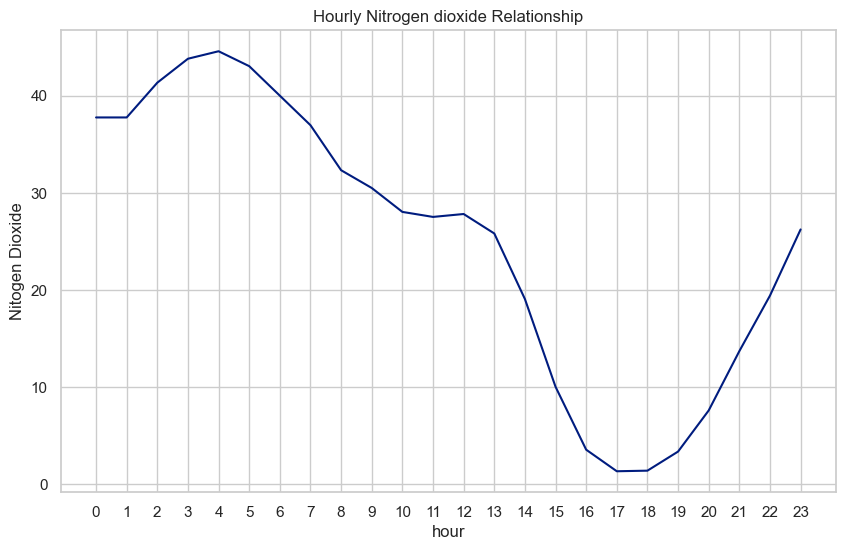

In [3]:
sns.set_theme(style='whitegrid', palette='dark')

plt.subplots(figsize=(10,6))

sns.lineplot(data=df_No2,x='hour', y='nitrogen_dioxide')

plt.xticks(range(0,24))
plt.ylabel('Nitogen Dioxide')
plt.title('Hourly Nitrogen dioxide Relationship')
plt.show()

# Relation Between pm10,pm2.5 and nitrogen oxide

In [4]:
city = df[df['city'] == 'Dehradun']
df_relation = city.groupby('hour')[['nitrogen_dioxide', 'pm10']].mean().sort_index()

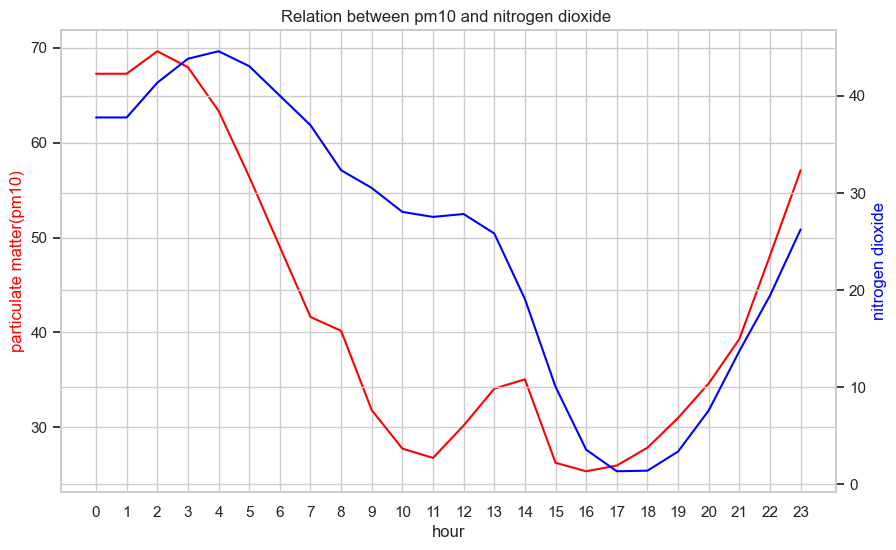

In [5]:
sns.set_theme(style='whitegrid', palette='dark')

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.lineplot(data=df_relation, x='hour', y='pm10', markers='o', color='red')
ax.set_ylabel('particulate matter(pm10)', color='red')

ax2= ax.twinx()

sns.lineplot(data=df_relation, x='hour', y='nitrogen_dioxide', markers='o', color='blue')
ax2.set_ylabel('nitrogen dioxide', color='blue')

plt.xticks(range(0, 24))
plt.title('Relation between pm10 and nitrogen dioxide ')
plt.show()

PM10 ↔ NO₂ = 0.69 (strong positive)

which means:
When PM10 increases, NO₂ usually increases too.

## Releation between Temperature and No2

In [6]:
city = df[df['city'] == 'Dehradun']
df_relation2 = city.groupby('hour')[['nitrogen_dioxide', 'temperature']].mean().sort_index()

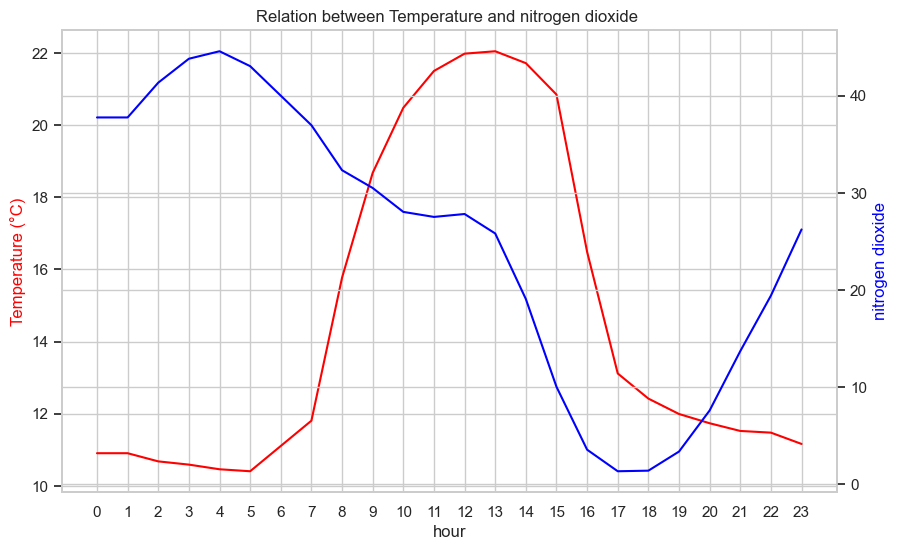

In [7]:
sns.set_theme(style='whitegrid', palette='dark')

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.lineplot(data=df_relation2, x='hour', y='temperature', markers='o', color='red')
ax.set_ylabel('Temperature (°C)', color='red')

ax2= ax.twinx()

sns.lineplot(data=df_relation2, x='hour', y='nitrogen_dioxide', markers='o', color='blue')
ax2.set_ylabel('nitrogen dioxide', color='blue')

plt.xticks(range(0, 24))
plt.title('Relation between Temperature and nitrogen dioxide ')
plt.show()

# Why does NO₂ behave opposite to temperature?
NO₂ shows a clear inverse daily pattern with temperature.
During nighttime and early morning, temperatures are low and NO₂ levels are high due to weak sunlight and poor mixing.
As temperature increases through the day, NO₂ rapidly decreases because sunlight breaks down NO₂ and warm air disperses pollutants.
This creates a strong negative relationship between temperature and NO₂.

## No2 and Ozone Relationship


In [8]:
city = df[df['city'] == 'Dehradun']
df_ozone = city.groupby('hour')[['nitrogen_dioxide', 'ozone']].mean().sort_index()

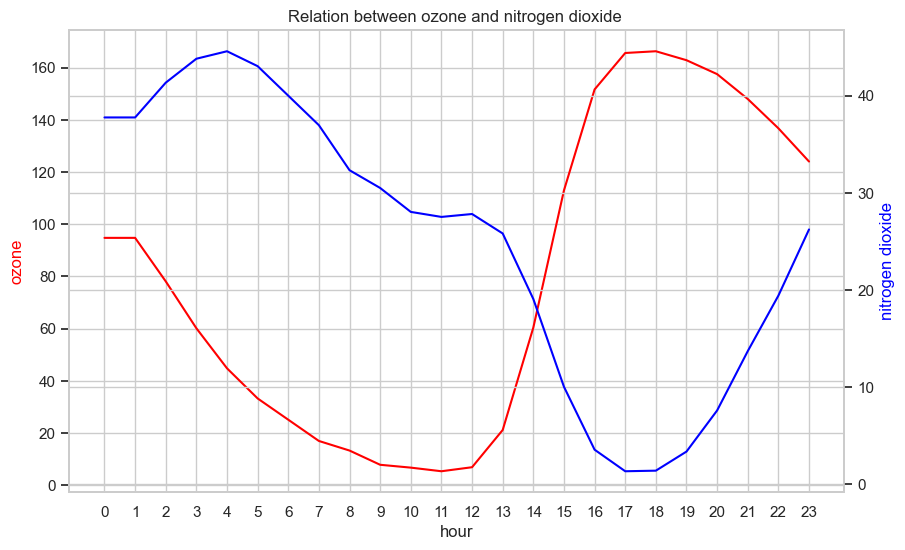

In [9]:
sns.set_theme(style='whitegrid', palette='dark')

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.lineplot(data=df_ozone, x='hour', y='ozone', markers='o', color='red')
ax.set_ylabel('ozone', color='red')

ax2= ax.twinx()

sns.lineplot(data=df_ozone, x='hour', y='nitrogen_dioxide', markers='o', color='blue')
ax2.set_ylabel('nitrogen dioxide', color='blue')

plt.xticks(range(0, 24))
plt.title('Relation between ozone and nitrogen dioxide ')
plt.show()